<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Getting_Started_with_nQubit_GHZstate_Qiskit_AerSimulator_mkbahk_20241023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=bced48fada4f23476cbd511f0e35c0b73f47310409ab2ccd9cceff25719aa360
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.1 MB/s eta 0:00:00


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
%pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [4]:
import qiskit
qiskit.__version__

'1.2.4'

In [5]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [6]:
from qiskit_aer import Aer, AerSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [7]:
Aer

In [8]:
AerSimulator()

AerSimulator('aer_simulator')

In [9]:
QasmSimulator()

QasmSimulator('qasm_simulator')

In [10]:
StatevectorSimulator()

StatevectorSimulator('statevector_simulator')

In [11]:
UnitarySimulator()

UnitarySimulator('unitary_simulator')

In [12]:
#backend =Aer.get_backend("qasm_simulator")
#backend =Aer.get_backend("aer_simulator_statevector")
#backend =Aer.get_backend("aer_simulator_unitary")
#backend = QasmSimulator()
backend = StatevectorSimulator()
#backend = UnitarySimulator()

In [13]:
from qiskit import QuantumCircuit

In [14]:
def n_qubit_GHZ_state(n):
  circuit = QuantumCircuit(n)
  for i in range(n-1):
    circuit.h(i)
    circuit.cx(i, i+1)
  ###
  circuit.measure_all()
  return circuit
###

In [25]:
n = 10 ### 10 Qubit정도 정상동작, 20Qubit이면 수행불가
qc = n_qubit_GHZ_state(n)

# The nQubit GHZ State

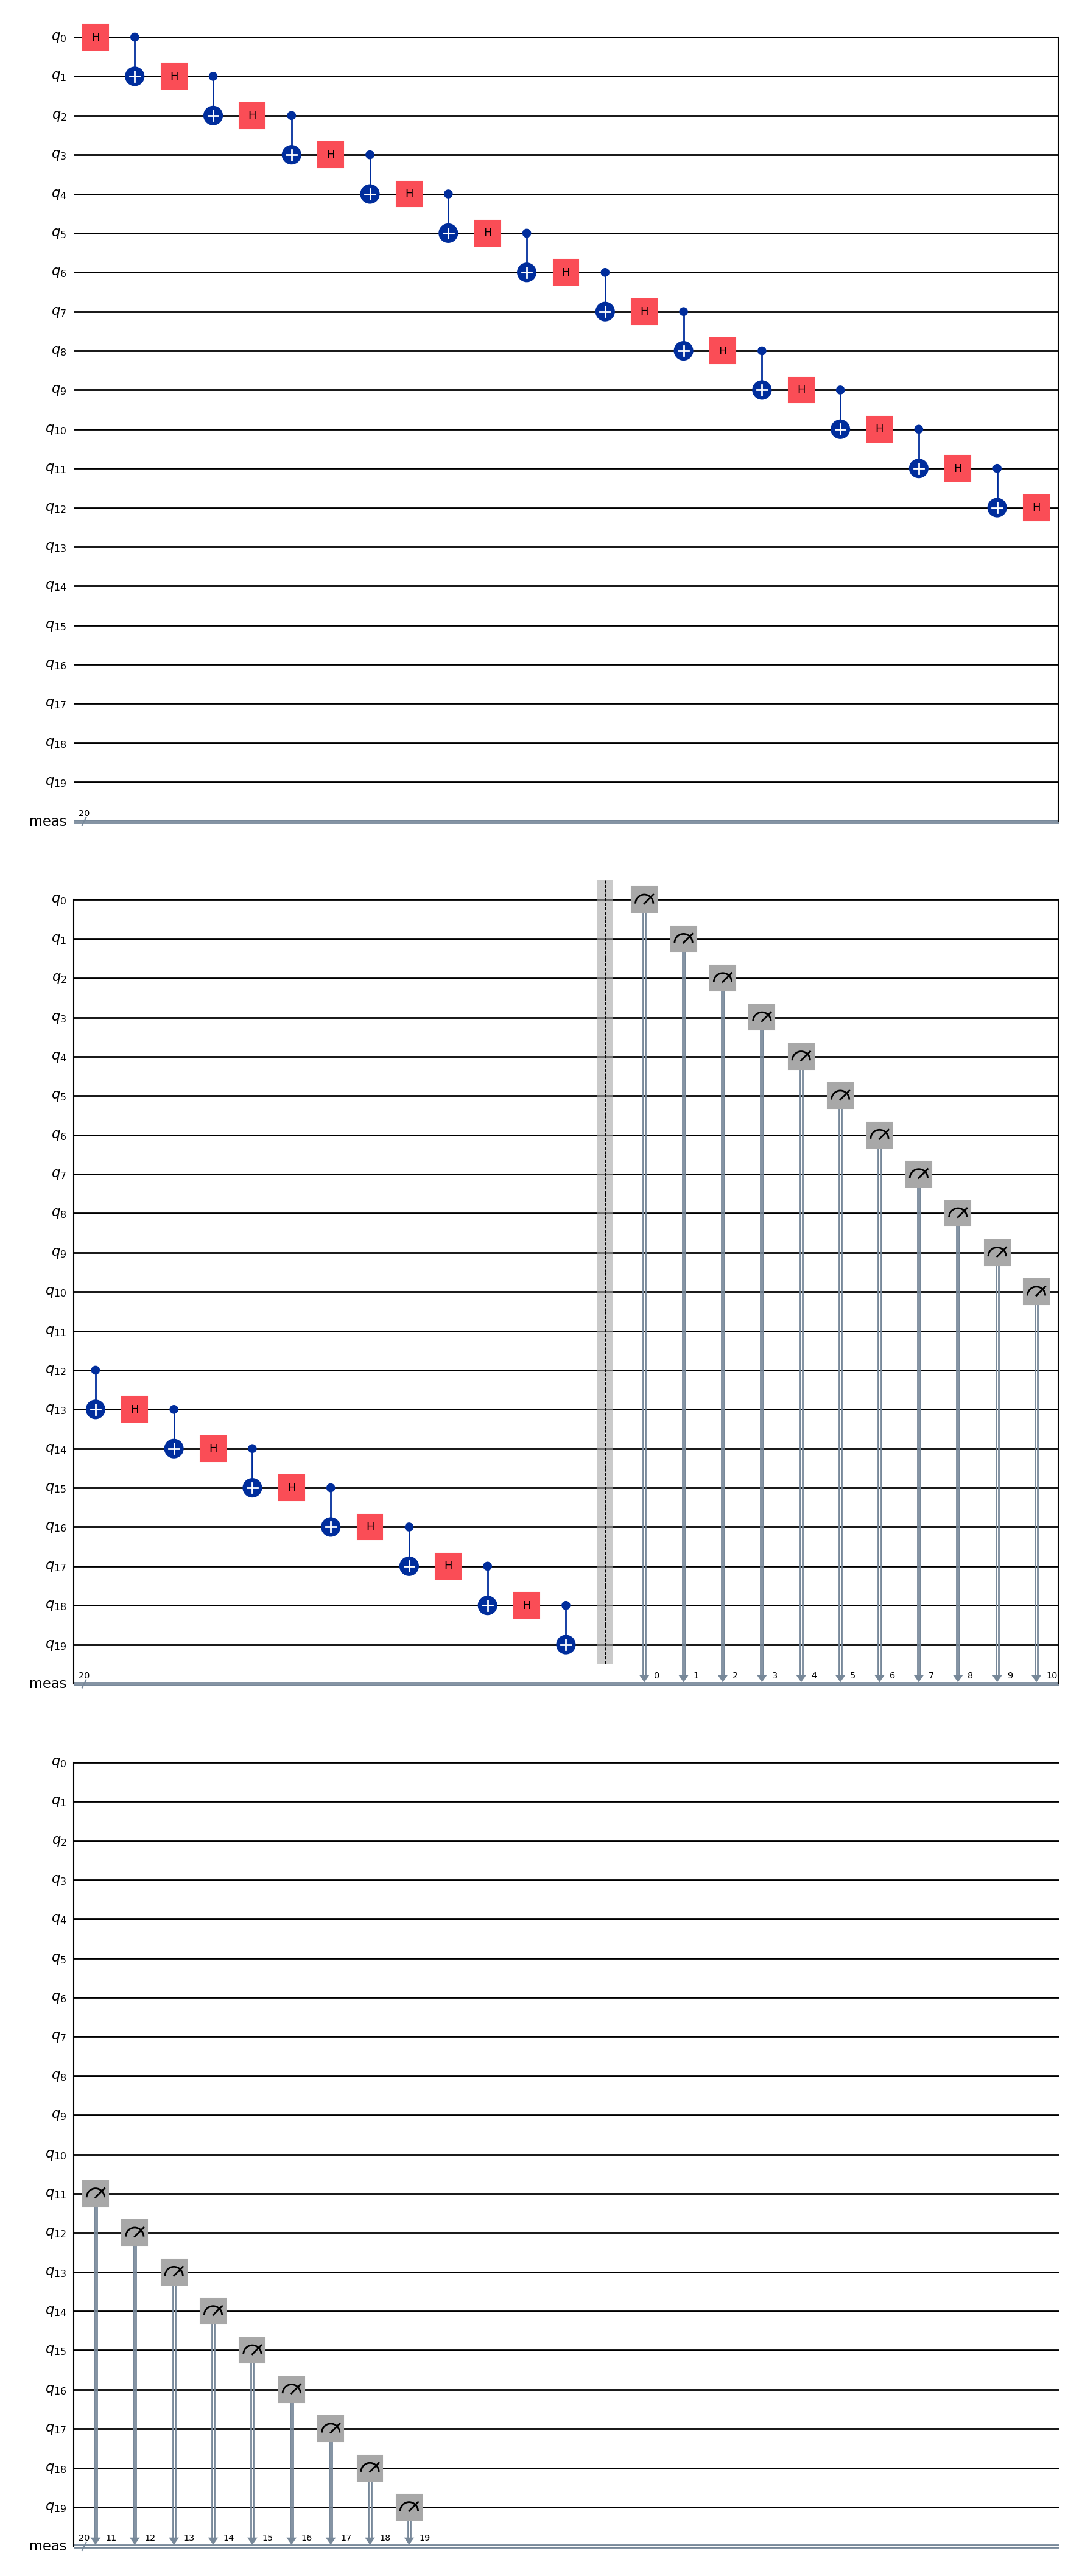

In [26]:
qc.draw(output="mpl")

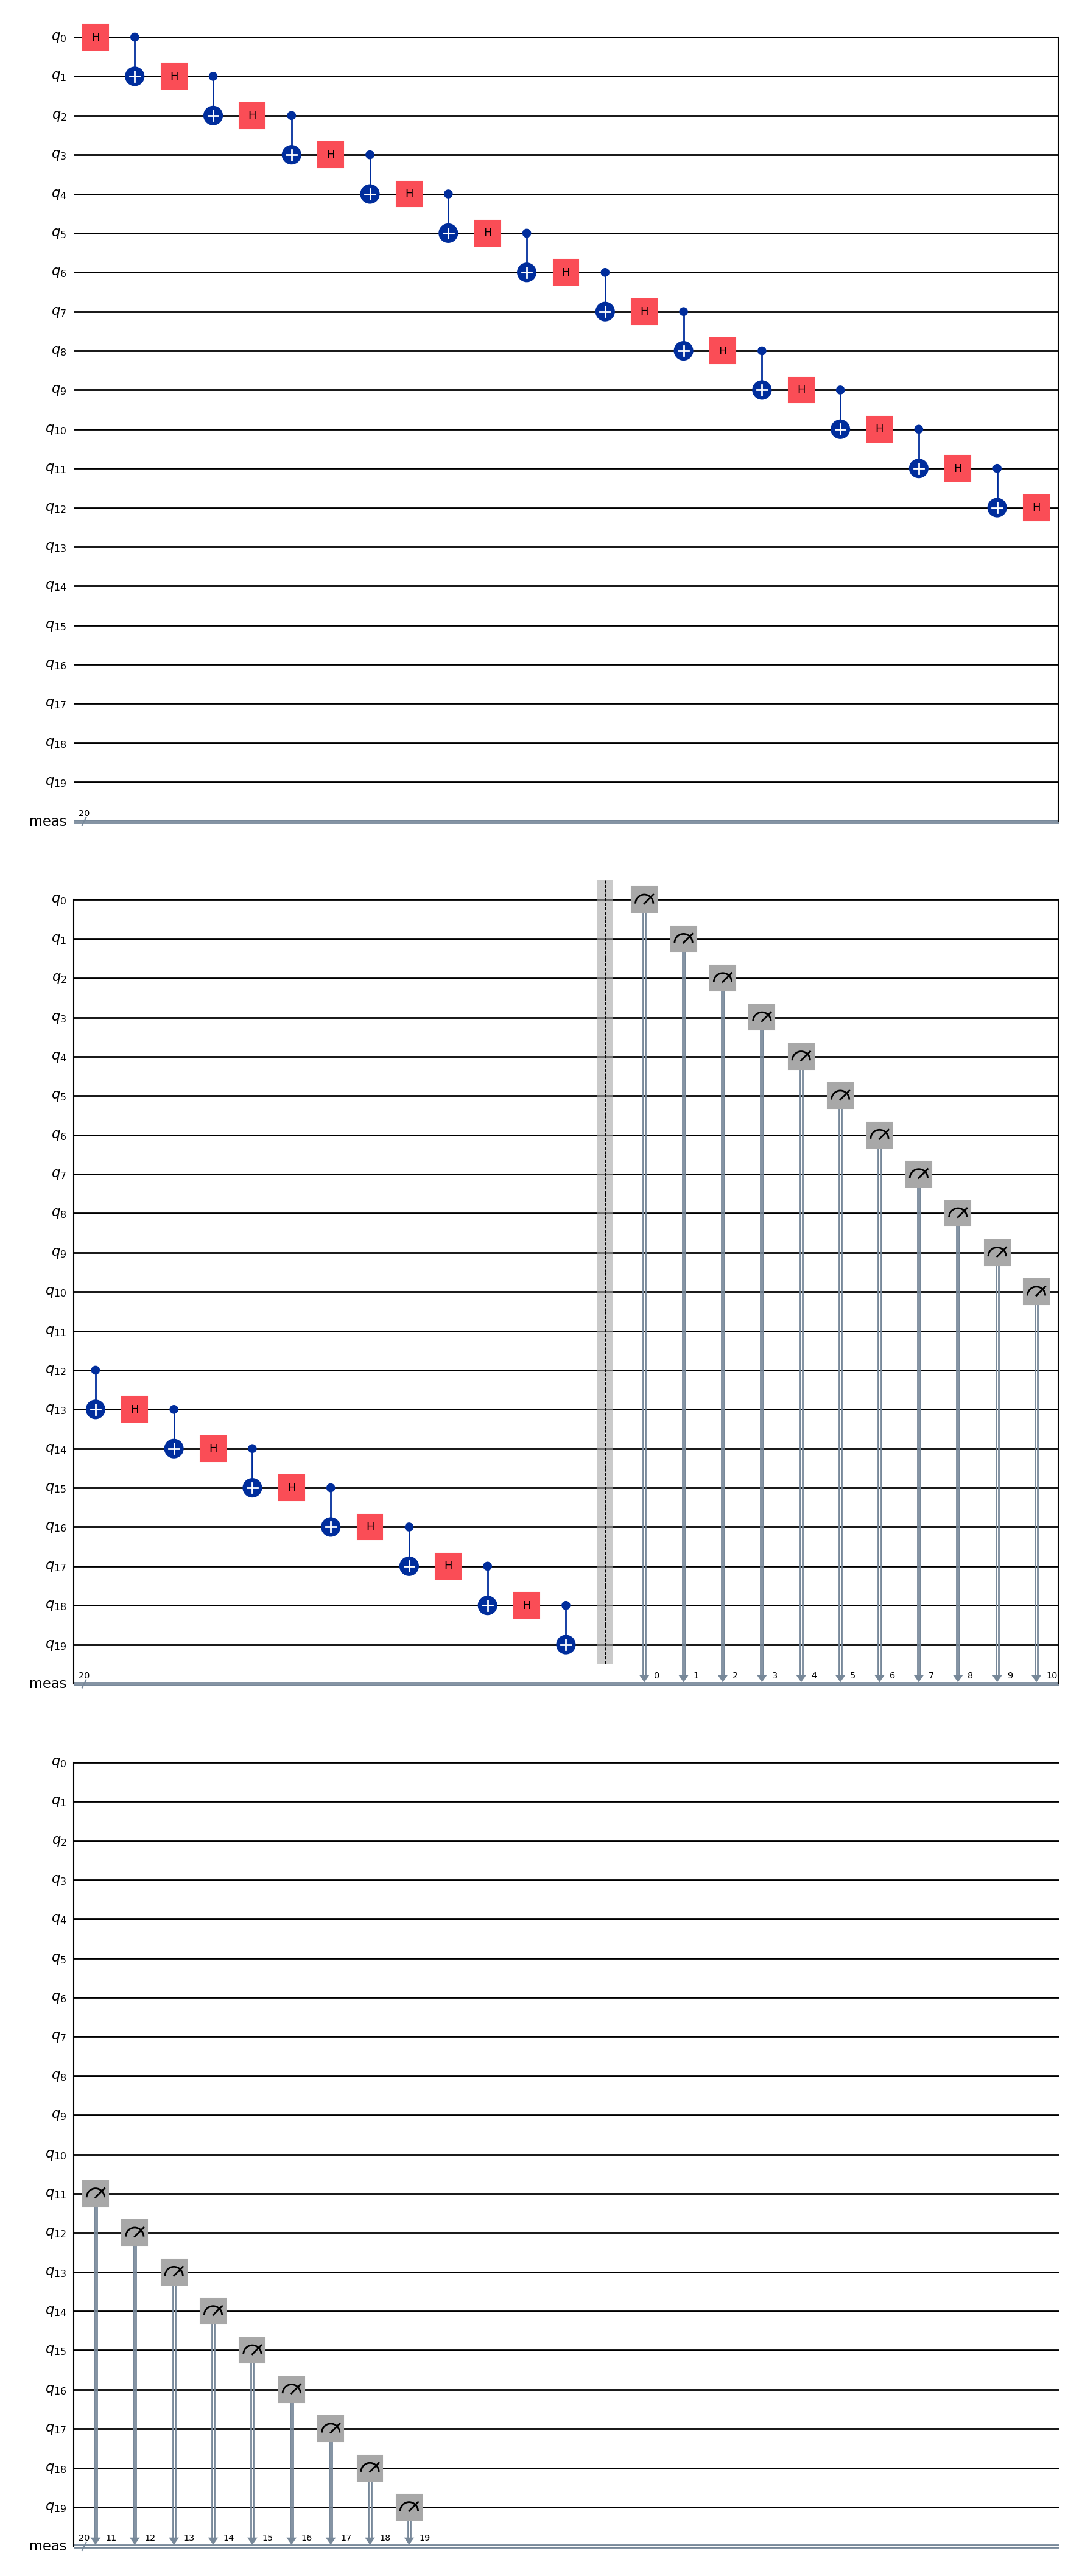

In [27]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(qc, backend=backend)
trans_qc.draw("mpl")

In [ ]:
#from qiskit.providers.jobstatus import JobStatus

#job = backend.run(trans_qc, shots=1024)
#job = backend.run(circuit, shots=1024)
# Use the job ID to retrieve your job data later
#print(f">>> Job ID: {job.job_id()}")

In [ ]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
##while

print("Job status is", job.status() )

In [19]:
print(job.status())

JobStatus.DONE


In [ ]:
### 서비스 플렛폼에 중간에 세션이 종료되었을 경우, Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
#job = service.job("csbevjh3olk6fc8cr0n0")

In [20]:
result = job.result()
result

Result(backend_name='statevector_simulator', backend_version='0.15.1', qobj_id='', job_id='1e23f5b5-245c-461f-8192-b2bbd9e3fd5e', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x65': 10, '0x77': 17, '0x16': 8, '0x12': 7, '0x1f': 16, '0x4': 13, '0x9': 15, '0x78': 17, '0x7a': 16, '0x72': 17, '0x2': 12, '0x68': 14, '0x70': 14, '0x14': 23, '0x7d': 21, '0x63': 17, '0x7': 22, '0x64': 16, '0x60': 12, '0xd': 20, '0x75': 16, '0x5': 16, '0x6f': 16, '0x8': 9, '0x17': 17, '0x74': 18, '0x13': 11, '0x15': 17, '0x1c': 21, '0x1b': 23, '0x6a': 11, '0x19': 9, '0x1e': 12, '0x0': 25, '0x6b': 17, '0x7c': 15, '0x7f': 17, '0x6d': 13, '0x66': 25, '0x69': 14, '0xf': 16, '0xc': 15, '0x61': 15, '0x6c': 16, '0x3': 19, '0x76': 23, '0x79': 10, '0x7b': 17, '0x10': 22, '0xa': 14, '0x6e': 13, '0x7e': 22, '0x71': 13, '0x6': 7, '0x11': 22, '0xb': 23, '0x18': 13, '0x1d': 13, '0x1': 21, '0x67': 17, '0x1a': 9, '0x73': 10, '0xe': 17, '0x62': 28}, statevect

# 진폭(Applitude)의 확률 출력하기

In [21]:
counts = result.get_counts()
counts

{'1100101': 10,
 '1110111': 17,
 '0010110': 8,
 '0010010': 7,
 '0011111': 16,
 '0000100': 13,
 '0001001': 15,
 '1111000': 17,
 '1111010': 16,
 '1110010': 17,
 '0000010': 12,
 '1101000': 14,
 '1110000': 14,
 '0010100': 23,
 '1111101': 21,
 '1100011': 17,
 '0000111': 22,
 '1100100': 16,
 '1100000': 12,
 '0001101': 20,
 '1110101': 16,
 '0000101': 16,
 '1101111': 16,
 '0001000': 9,
 '0010111': 17,
 '1110100': 18,
 '0010011': 11,
 '0010101': 17,
 '0011100': 21,
 '0011011': 23,
 '1101010': 11,
 '0011001': 9,
 '0011110': 12,
 '0000000': 25,
 '1101011': 17,
 '1111100': 15,
 '1111111': 17,
 '1101101': 13,
 '1100110': 25,
 '1101001': 14,
 '0001111': 16,
 '0001100': 15,
 '1100001': 15,
 '1101100': 16,
 '0000011': 19,
 '1110110': 23,
 '1111001': 10,
 '1111011': 17,
 '0010000': 22,
 '0001010': 14,
 '1101110': 13,
 '1111110': 22,
 '1110001': 13,
 '0000110': 7,
 '0010001': 22,
 '0001011': 23,
 '0011000': 13,
 '0011101': 13,
 '0000001': 21,
 '1100111': 17,
 '0011010': 9,
 '1110011': 10,
 '0001110': 17

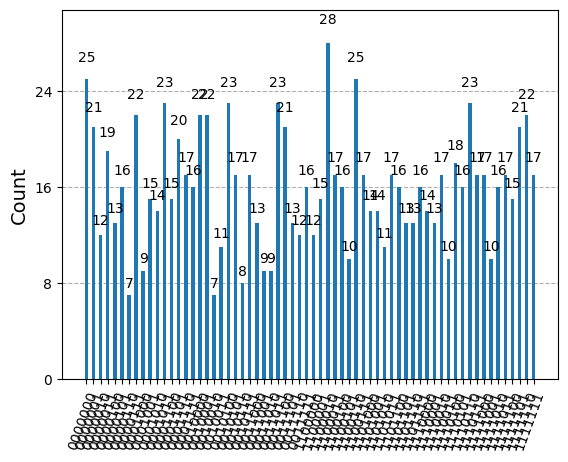

In [22]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

#상태벡터 출력하기

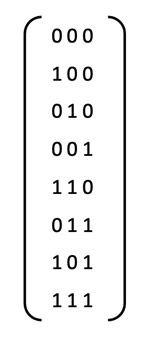

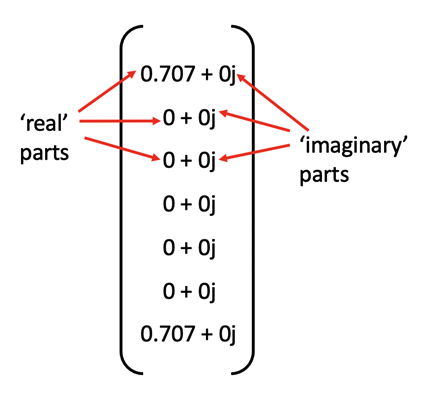

In [23]:
statevector = result.get_statevector()
statevector

Statevector([ 0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j, -0.+0.0000000e+00j,
             -0.+0.0000000e+00j, -0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j, -0.+0.0000000e+00j,  1.-2.4492936e-16j,
              0.+0.0000000e+00j, -0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -0.+0.0000000e+00j, -0.+0.0000000e+00j, -0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
             -0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j,  0.+0.0000000e+00j,
              0.+0.0000000e+00j,  0.+0.0000000e+00j

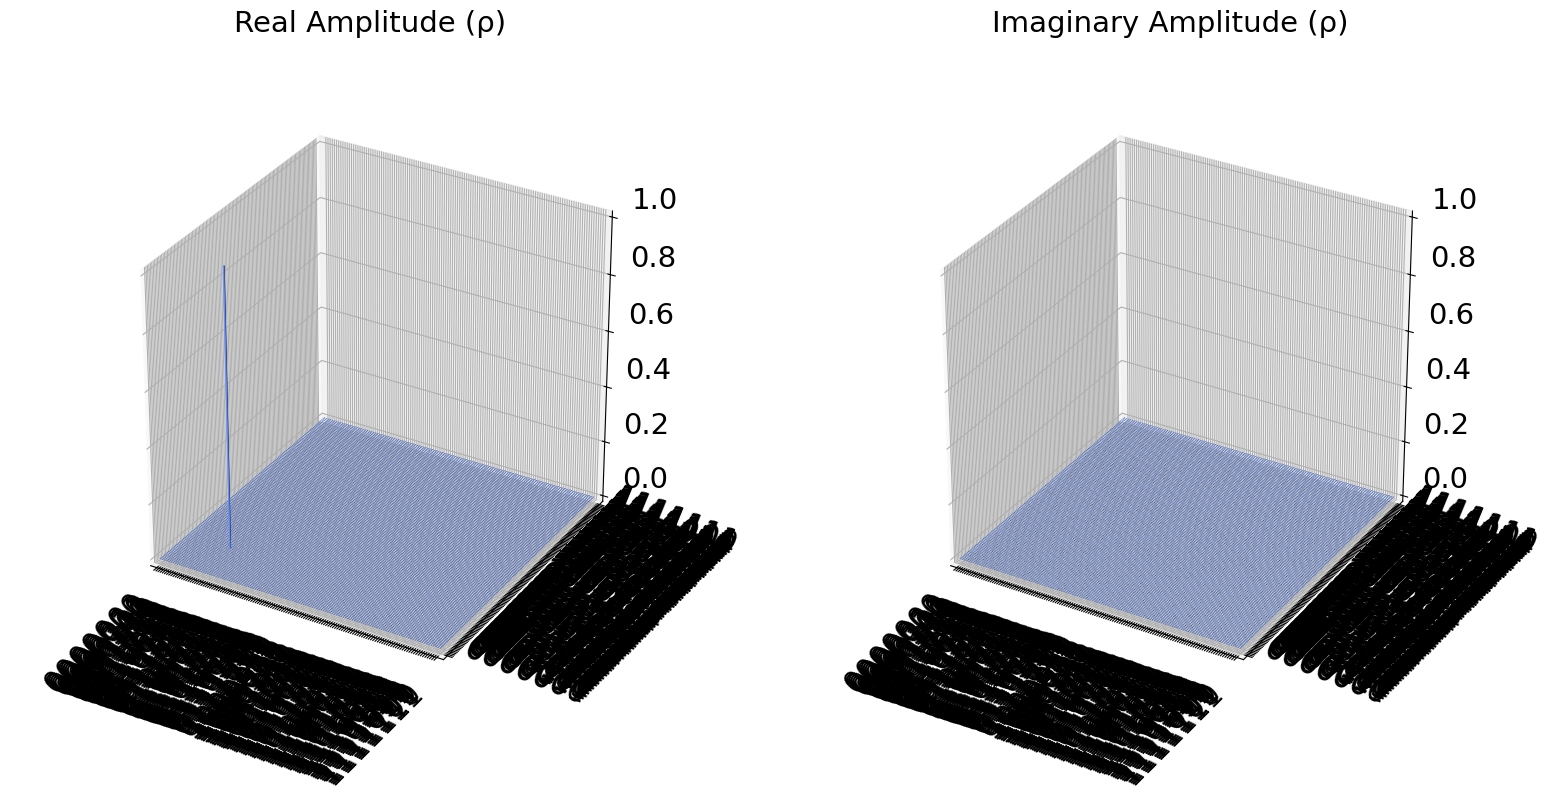

In [24]:
from qiskit.visualization import plot_state_city
plot_state_city(statevector)